## Observations and Insights 

In [82]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import pylab as p
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, how='left')

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [83]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].value_counts())
mice_count

249

In [84]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = combined_data[combined_data.duplicated(["Mouse ID"])]
duplicated.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_unique = combined_data.drop_duplicates(subset=['Mouse ID'])
combined_data_unique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [87]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = len(combined_data_unique)
unique_mice_count

249

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groupby = combined_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_groupby["Tumor Volume (mm3)"].mean()
median = drug_groupby["Tumor Volume (mm3)"].median()
variance = drug_groupby["Tumor Volume (mm3)"].var()
stdev = drug_groupby["Tumor Volume (mm3)"].std()
sem = drug_groupby["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.

drug_df = pd.DataFrame({"Mean": mean,
                      "Median": median,
                      "Variance": variance,
                      "Standard Deviation": stdev,
                      "SEM": sem})
drug_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

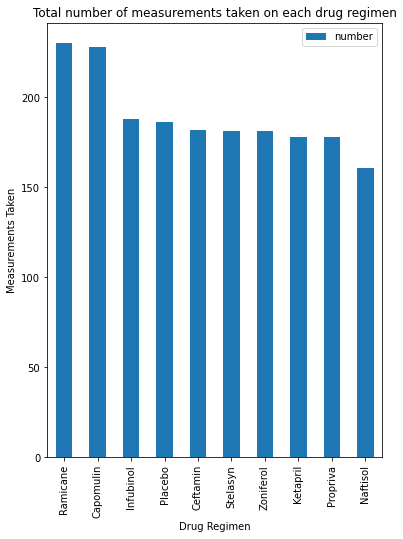

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#find measurements per drug regime
measure_data = combined_data["Drug Regimen"].unique()
#find the number of each drug regime
number_measure_data = combined_data["Drug Regimen"].value_counts()
#plot from a dataframe
pandas_data = pd.DataFrame({"Measure":measure_data,
                          "number":number_measure_data})
pandas_data.plot.bar(x="Measure", y="number", figsize=(6,8))
plt.title("Total number of measurements taken on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken");


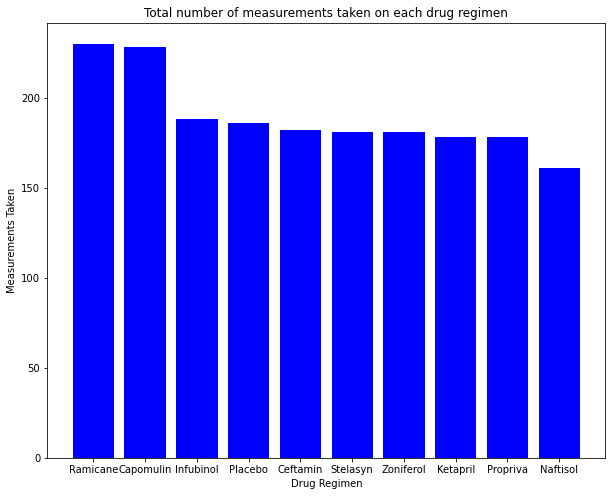

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_graph = plt.bar(measure_data, number_measure_data, color="b", align="center")
plt.gcf().set_size_inches(10, 8)
plt.title("Total number of measurements taken on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")
plt.show();

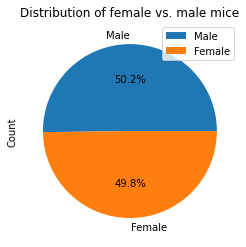

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Find the genders
gender_count = combined_data_unique["Sex"].value_counts()
#find how many of each gender
genders = combined_data_unique["Sex"].unique()
gender_df = pd.DataFrame({"Count":gender_count},
                        index=genders)
gender_df.plot.pie(y='Count', title = "Distribution of female vs. male mice", 
                      autopct = "%1.1f%%",);


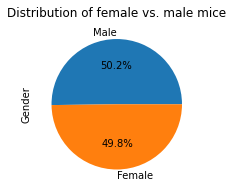

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fib, ax = plt.subplots(figsize=(3,3))
ax.pie(gender_count, labels=genders, autopct="%1.1f%%")
ax.set(title = "Distribution of female vs. male mice",
       ylabel = "Gender");

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_group = combined_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(final_tumor_group, combined_data, on=("Mouse ID","Timepoint"))
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_df.iterrows():
    if row[2] == "Infubinol":
        infubinol.append(row[6])
    elif row[2] == "Capomulin":
        capomulin.append(row[6])
    elif row[2] == "Ramicane":
        ramicane.append(row[6])
    elif row[2] == "Ceftamin":
        ceftamin.append(row[6])
    
    # add subset 
drug_df = pd.DataFrame({"Infubinol":infubinol,
                       "Capomulin":capomulin,
                       "Ramicane":ramicane,
                       "Ceftamin":ceftamin})
    
    # Determine outliers using upper and lower bounds
Infubinol_quartiles = drug_df["Infubinol"].quantile([.25, .5, .75])
Infubinol_lowerq = Infubinol_quartiles[.25]
Infubinol_upperq = Infubinol_quartiles[.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq
Infubinol_lowerbound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upperbound = Infubinol_upperq + (1.5*Infubinol_iqr)

Capomulin_quartiles = drug_df["Capomulin"].quantile([.25, .5, .75])
Capomulin_lowerq = Capomulin_quartiles[.25]
Capomulin_upperq = Capomulin_quartiles[.75]
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq
Capomulin_lowerbound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upperbound = Capomulin_upperq + (1.5*Capomulin_iqr)

Ramicane_quartiles = drug_df["Ramicane"].quantile([.25, .5, .75])
Ramicane_lowerq = Ramicane_quartiles[.25]
Ramicane_upperq = Ramicane_quartiles[.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq
Ramicane_lowerbound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upperbound = Ramicane_upperq + (1.5*Ramicane_iqr)

Ceftamin_quartiles = drug_df["Ceftamin"].quantile([.25, .5, .75])
Ceftamin_lowerq = Ceftamin_quartiles[.25]
Ceftamin_upperq = Ceftamin_quartiles[.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ceftamin_lowerbound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upperbound = Ceftamin_upperq + (1.5*Ceftamin_iqr)


In [97]:
#outlier plot
capomulin_outlier = []
ramicane_outlier = []
infubinol_outlier = []
ceftamin_outlier = []

#move outliers into separate lists
for index, row in merged_df.iterrows():
    if row[2] == "Infubinol" and (row[6] < Infubinol_lowerbound or row[6] > Infubinol_upperbound):
        infubinol_outlier.append(row[6])
    elif row[2] == "Capomulin" and row[6] < Capomulin_lowerbound or row[6] > Capomulin_upperbound:
        capomulin_outlier.append(row[6])
    elif row[2] == "Ramicane" and row[6] < Ramicane_lowerbound or row[6] > Ramicane_upperbound:
        ramicane_outlier.append(row[6])
    elif row[2] == "Ceftamin" and row[6] < Ceftamin_lowerbound or row[6] >Ceftamin_upperbound:
        ceftamin_outlier.append(row[6])
outlier_list = [capomulin_outlier, ramicane_outlier, infubinol_outlier, ceftamin_outlier]
outlier_list


[[67.97341878,
  65.52574285,
  70.71762058,
  62.99935619,
  63.44068627,
  66.79415599,
  60.12201052,
  57.03186187,
  66.08306589,
  62.19141437,
  60.41370908,
  74.99776443,
  72.25596306,
  62.76509317,
  55.74514628,
  56.05774909,
  73.05136339,
  55.74282869,
  72.55523894,
  72.2267309,
  67.94212107,
  65.81516535,
  64.57522157,
  74.04039018,
  61.84005842,
  58.04656941,
  69.04284082,
  69.82314577,
  62.17570465,
  65.41595451,
  60.96971133,
  64.18322918,
  60.23373278,
  63.1056963,
  73.21293851,
  55.1389525,
  62.43540402,
  68.3597767,
  57.74875831,
  60.91876652,
  73.32443228,
  52.07951009,
  71.90511721,
  68.16319517,
  69.87225079,
  61.77496268,
  70.49278763,
  62.57087961,
  74.10408567,
  55.45528975,
  67.28962147,
  58.63340414,
  53.30318455,
  65.34181087,
  52.94290169,
  61.84902336,
  64.29408493,
  69.56362076,
  70.65383162,
  68.92318457,
  73.71561899999999,
  66.19691151,
  52.10557382,
  52.69342276,
  62.11727887,
  69.29914907,
  60.752

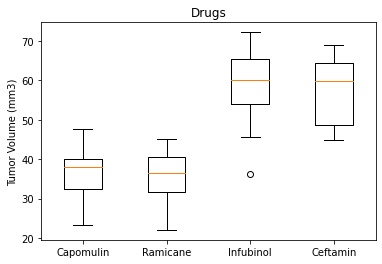

In [98]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#combine lists
treatment_list = [capomulin, ramicane, infubinol, ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Drugs')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(treatment_list)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

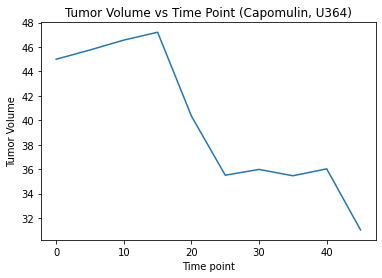

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#create DF for capomulin
cap_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
#create df for specific mouse
df_mouse = cap_df.loc[cap_df["Mouse ID"] == "u364"]
#find tumor and time values
line_tumor = df_mouse["Tumor Volume (mm3)"]
line_time = df_mouse["Timepoint"]
#plot
plt.plot(line_time, line_tumor)
plt.title("Tumor Volume vs Time Point (Capomulin, U364)")
plt.ylabel("Tumor Volume")
plt.xlabel("Time point")
plt.show()

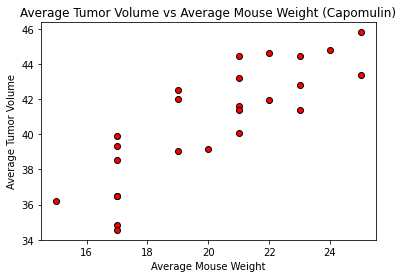

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group based off  mouse ID
cap_df_scatter = cap_df.groupby("Mouse ID")
#find average
tumor_avg = cap_df_scatter["Tumor Volume (mm3)"].mean()
weight_avg = cap_df_scatter["Weight (g)"].mean()
#plot
plt.scatter(weight_avg, tumor_avg, marker="o", facecolors="red", edgecolors="black")
plt.title("Average Tumor Volume vs Average Mouse Weight (Capomulin)")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [101]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(weight_avg,tumor_avg)[0],2)
print(f"The correlation coefficient between average mouse weight and average tumor volume is {correlation}.")

The correlation coefficient between average mouse weight and average tumor volume is 0.84.


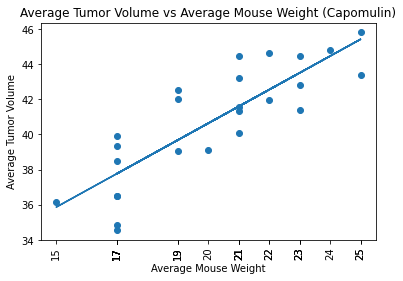

In [102]:
#calc regression line
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    weight_avg, tumor_avg)
aa_fit = aa_slope * weight_avg + aa_int
#plot regression line on top of previous scatter
plt.scatter(weight_avg, tumor_avg)
plt.plot(weight_avg,aa_fit,"-")
plt.xticks(weight_avg, rotation=90)
plt.title("Average Tumor Volume vs Average Mouse Weight (Capomulin)")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()